<a href="https://colab.research.google.com/github/sujata1712/Capstone_Project_2/blob/main/SEMICONDUCTOR_MANUFACTURING_PROCESS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***CAPSTONE PROJECT 2:***


---


## ***SEMICONDUCTOR MANUFACTURING PROCESS***

# **Introduction:-**

* ***Context:***

  In modern semiconductor manufacturing, the progress is well-organized to different sensor signals. On the other hand, they are not all the same as some noise data or irrelevant data occur. Engineers often have more signals than needed, so they use feature selection to identify the most relevant ones. These signals can be useful not only in the improvement of the process efficiency but also in the cost reduction and in the assurance of a better understanding of the factors affecting production yield. A detailed consideration of various feature combinations is the key to finding out the signals that bring about a dramatic change in the output.

* ***Data Description:***
  
  The dataset is sensor-data.csv : (1567, 592)

  The data consists of 1567 examples each with 591 features.The dataset presented in this case represents a selection of such features where each example represents a single production entity with associated measured features and the labels represent a simple pass/fail yield for in house line testing. Target column “ –1” corresponds to a pass and “1” corresponds to a fail and the data time stamp is for that specific test point.

* ***Objective:***

  We purpose to construct a classifier for predicting the Pass/Fail yield of a specific process entity and to evaluate whether all the features are necessary to build the model or not.

# **Importing Required Libraries:-**


In [ ]:
import numpy as np                            # For numerical operations
import pandas as pd                           # For data manipulation
import matplotlib.pyplot as plt               # Necessary module for plotting purpose
import seaborn as sns                         # For Data Visualization

# For Data Pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# For Model Training, Testing, and Tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score

# For Saving the model
from joblib import dump, load

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# **Connect to Google Drive:-**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **1. Import and Explore the data:**

In [ ]:
# Load the dataset
data=pd.read_csv('/content/drive/MyDrive/Capstone Project 2/sensor-data.csv')

In [ ]:
# Extract the shape of the dataset
data.shape

(1567, 592)

In [ ]:
# Display the first few rows of the dataset
data.head()

,Time,0,1,2,3,4,5,6,7,8,...,581,582,583,584,585,586,587,588,589,Pass/Fail
0,2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,2008-07-19 12:32:00,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2008-07-19 13:17:00,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2008-07-19 14:43:00,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,2008-07-19 15:22:00,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [ ]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 592 entries, Time to Pass/Fail
dtypes: float64(590), int64(1), object(1)
memory usage: 7.1+ MB


In [ ]:
# Display summary statistics of the dataset
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


# **2. Data Cleansing:**

### ***Missing Value Treatment:***

Identify and handle the missing values in the dataset to ensure that the data is clean and ready for analysis.

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
print("Columns with missing values:\n", missing_values[missing_values > 0])
print("\nTotal number of missing values:", missing_values.sum())

Columns with missing values:
 0       6
1       7
2      14
3      14
4      14
       ..
585     1
586     1
587     1
588     1
589     1
Length: 538, dtype: int64

Total number of missing values: 41951


In [ ]:
# # Drop columns with too many missing values
# threshold=int(0.8 * len(data))                # we can adjust threshold as needed,here we set it for 80%
# data = data.dropna(thresh=threshold,axis=1)

# # Check the shape after droping columns with too many missing values
# print("Data shape after dropping columns with too many missing values:", data.shape)

In [ ]:
# Drop columns with excessive missing values or those irrelevant based on domain knowledge
data = data.drop(columns=['irrelevant_column1', 'irrelevant_column2'], errors='ignore')

# Verify changes
print('Columns after dropping unnecessary attributes:\n',data.columns)

Columns after dropping unnecessary attributes:
 Index(['Time', '0', '1', '2', '3', '4', '5', '6', '7', '8',
       ...
       '581', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=592)


In [ ]:
# Fill missing values with median for numeric columns only
data = data.select_dtypes(include=['number'])
data[data.columns] = data.fillna(data.median())

# Recheck the total no. of missing values
print("Total number of missing values:", data.isnull().sum().sum())

Total number of missing values: 0


### ***Dropping Unnecessary Attributes:***

Drop any unnecessary attributes for the analysis based on functional knowledge.

In [ ]:
# Removing duplicate rows if any
data.drop_duplicates(inplace=True)

In [ ]:
# Drop the 'Time' column
data.drop(columns=['Time'], inplace=True, errors='ignore')

# Verify changes
print('Columns after dropping unnecessary attributes:\n',data.columns)

Columns after dropping unnecessary attributes:
 Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '581', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=591)


In [ ]:
# Drop the columns which has low veriance
low_veriance_column=data.columns[data.std() < 0.01]
print(" Low-variance Columns that could be dropped: \n", low_veriance_column)

#Verify changes
print("\nColumn after dropping low veriance column:\n",data.columns)

 Low-variance Columns that could be dropped: 
 Index(['5', '7', '10', '13', '42', '49', '52', '56', '57', '69',
       ...
       '542', '543', '544', '578', '579', '580', '582', '584', '587', '588'],
      dtype='object', length=173)

Column after dropping low veriance column:
 Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
       ...
       '581', '582', '583', '584', '585', '586', '587', '588', '589',
       'Pass/Fail'],
      dtype='object', length=591)


### ***Data Modification:***

In [ ]:
data['Pass/Fail'].unique()

array([-1,  1])

In [ ]:
data['Pass/Fail']=data['Pass/Fail'].map({-1:0,1:1})
data['Pass/Fail'].unique()

array([0, 1])

In [ ]:
data['Pass/Fail'].value_counts()

,count
Pass/Fail,
0,1463
1,104


# **3. Data Analysis & Visualization:**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Columns: 591 entries, 0 to Pass/Fail
dtypes: float64(590), int64(1)
memory usage: 7.1 MB


In [ ]:
print("Statistical Summary of the Dataset:")
data.describe()

Statistical Summary of the Dataset:


,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,Pass/Fail
count,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.0,1567.000000,1567.000000,1567.000000,1567.000000,...,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000,1567.000000
mean,3014.441551,2495.866110,2200.551958,1395.383474,4.171281,100.0,101.116476,0.121825,1.462860,-0.000842,...,82.403069,0.500096,0.015317,0.003846,3.067628,0.021458,0.016474,0.005283,99.652345,0.066369
std,73.480841,80.228143,29.380973,439.837330,56.103721,0.0,6.209385,0.008936,0.073849,0.015107,...,56.348694,0.003403,0.017174,0.003719,3.576899,0.012354,0.008805,0.002866,93.864558,0.249005
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,0.000000
25%,2966.665000,2452.885000,2181.099950,1083.885800,1.017700,100.0,97.937800,0.121100,1.411250,-0.010800,...,72.288900,0.497900,0.011600,0.003100,2.306500,0.013450,0.010600,0.003300,44.368600,0.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,0.000000
75%,3056.540000,2538.745000,2218.055500,1590.169900,1.518800,100.0,104.530000,0.123800,1.516850,0.008400,...,72.288900,0.502350,0.016500,0.004100,3.294950,0.027600,0.020300,0.006400,114.749700,0.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


### ***Univariate Analysis:***

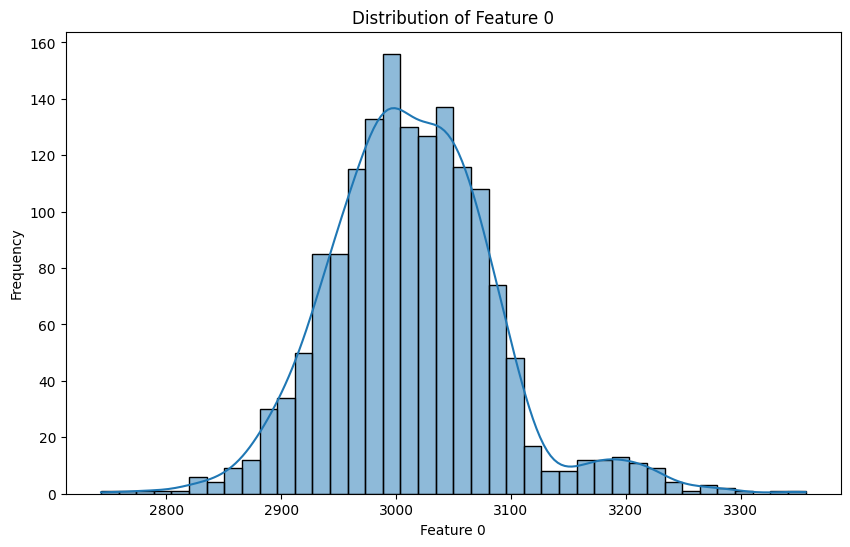

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['0'], kde=True)  # Assuming '0' is the feature you want to analyze
plt.title('Distribution of Feature 0')
plt.xlabel('Feature 0')
plt.ylabel('Frequency')
plt.show()

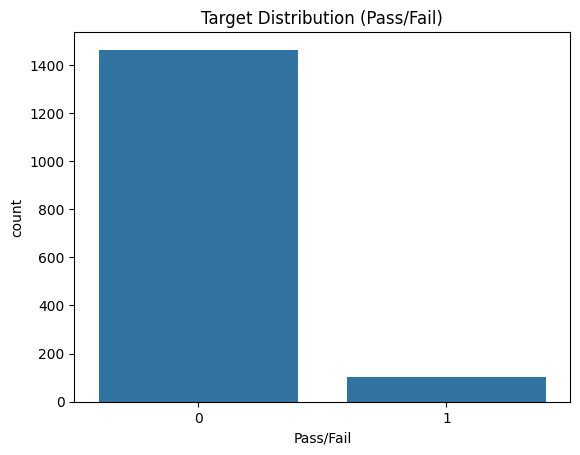

In [ ]:
# Visualize target variable distribution
sns.countplot(x='Pass/Fail',data=data)
plt.title('Target Distribution (Pass/Fail)')
plt.show()

### ***Bivariate Analysis:***

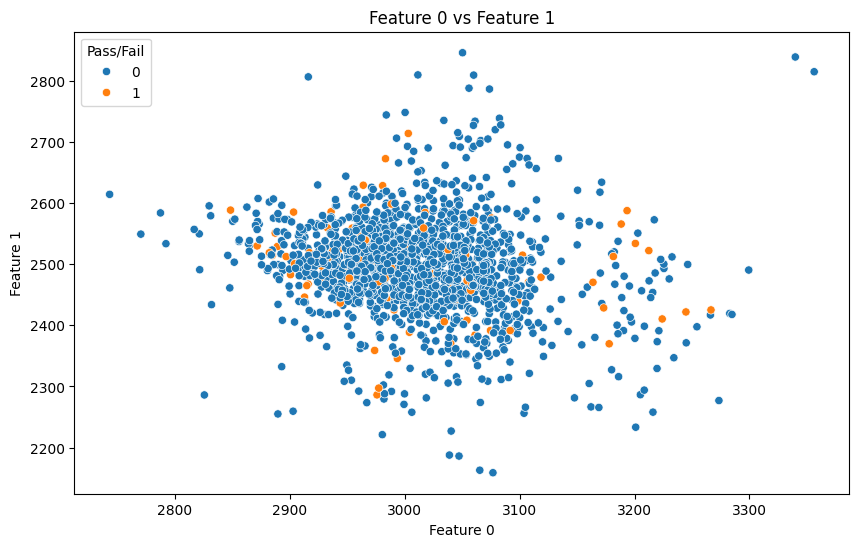

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='0', y='1', hue='Pass/Fail', data=data)  # Assuming '0' and '1' are the features you want to analyze
plt.title('Feature 0 vs Feature 1')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.show()

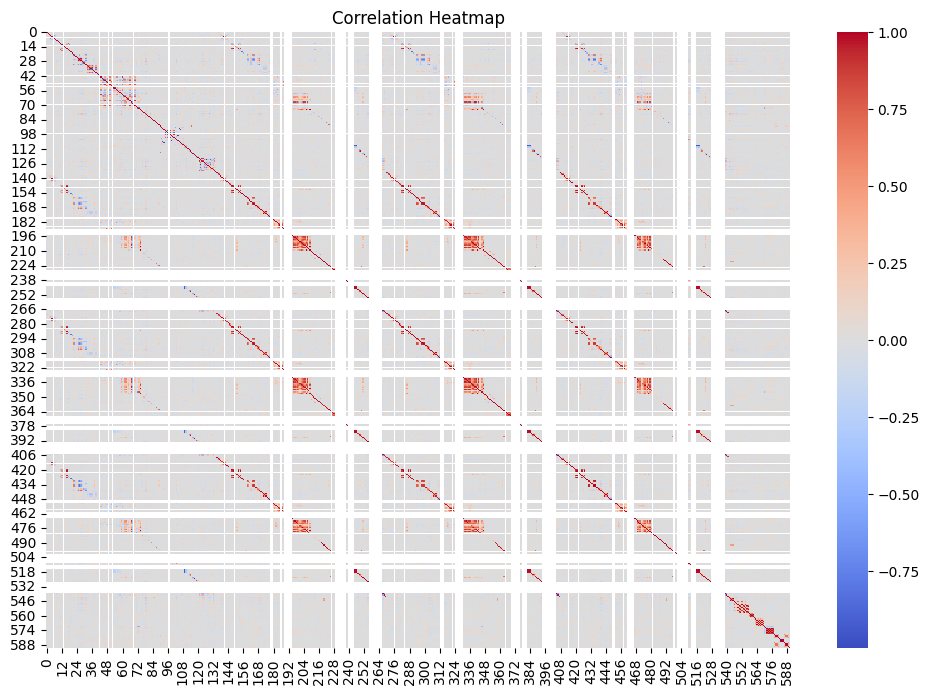

In [ ]:
# Correlation heatmap for all features
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

### ***Multivariate Analysis:***

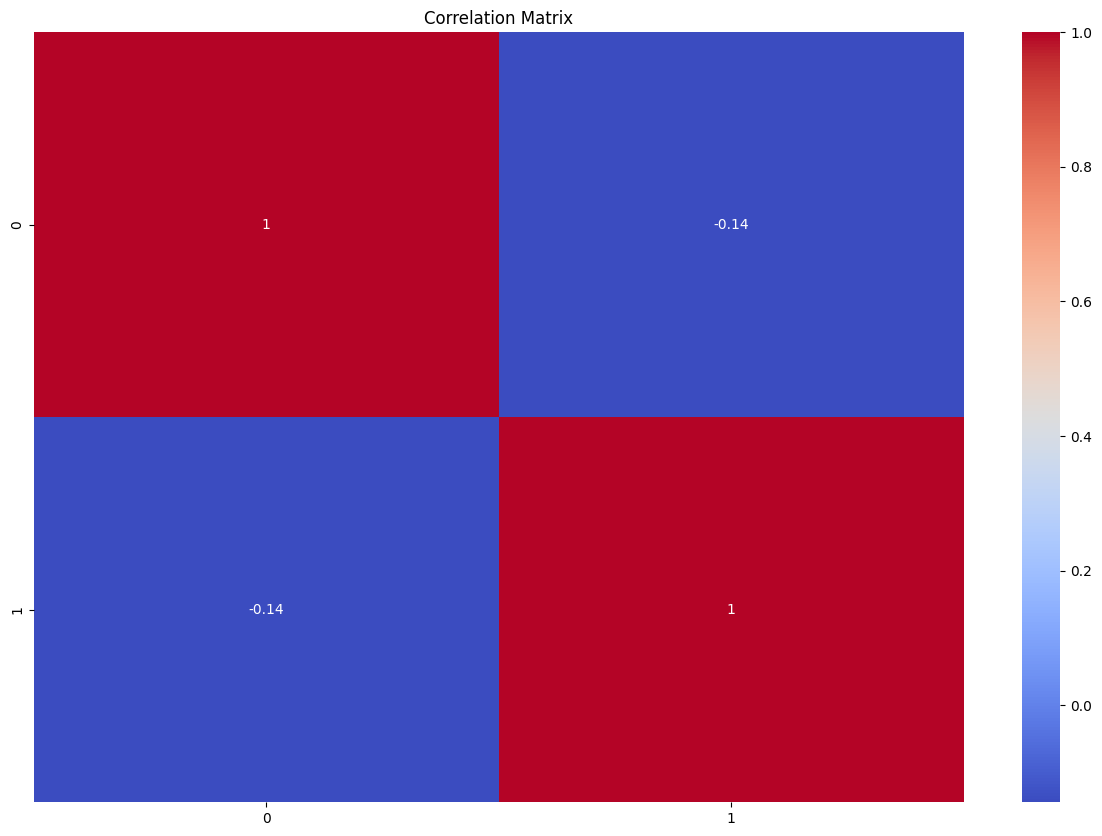

In [ ]:
# Correlation Matrix for Multivariate Analysis
plt.figure(figsize=(15, 10))
correlation_matrix = data[['0', '1']].corr()  # Include only numeric columns for correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

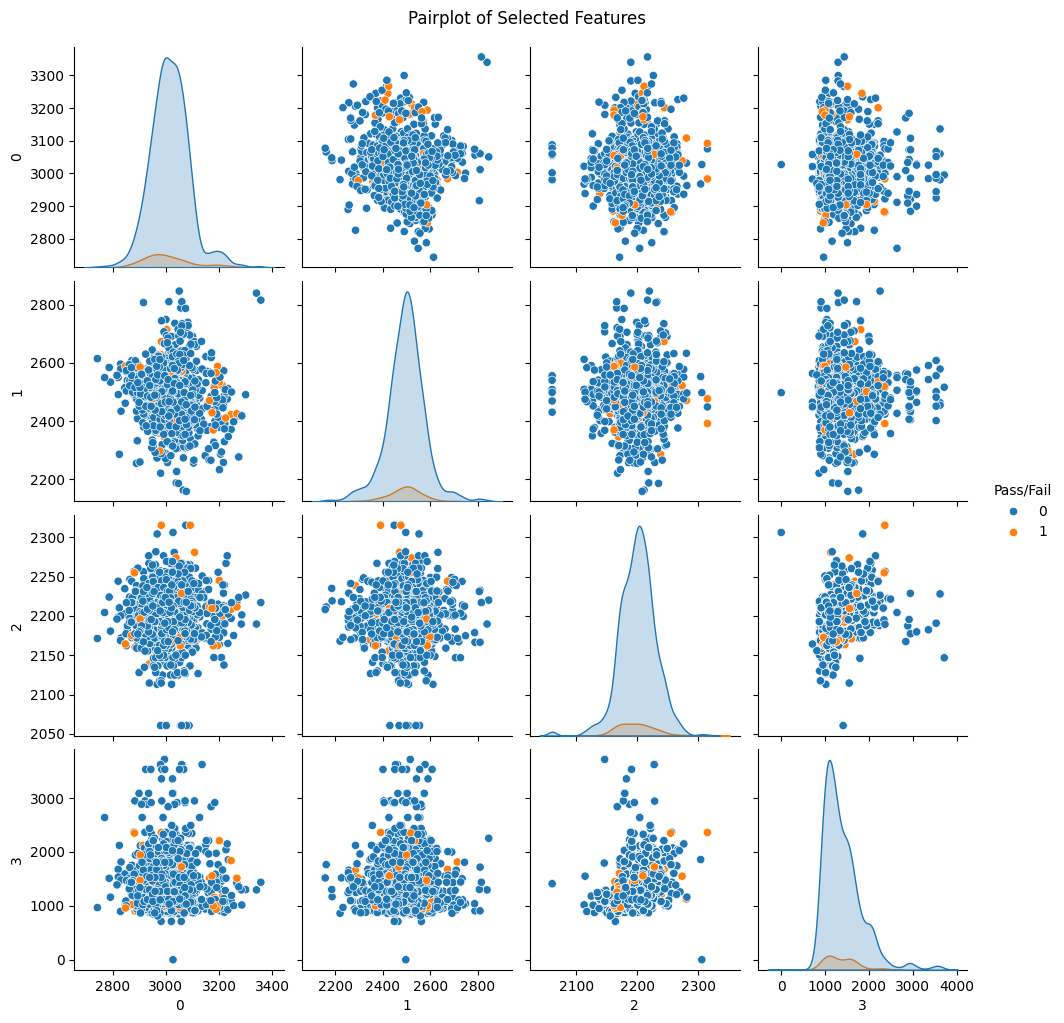

In [ ]:
# Updated selected features based on actual column names in the DataFrame
selected_features = ['0', '1', '2', '3', 'Pass/Fail']

# Pairplot to visualize relationships between the selected features and the target variable
sns.pairplot(data[selected_features], hue='Pass/Fail')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

# **4. Data Pre-processing:**

### ***Segregate Predictors vs Target Attributes***

In [ ]:
# Segregate predictors and target  attributes
x = data.drop(columns=['Pass/Fail'])                # Predictors
y = data['Pass/Fail']                               # Target

# Verify shapes
print("Predictors (x) shape:", x.shape)
print("Target (y) shape:", y.shape)


Predictors (x) shape: (1567, 590)
Target (y) shape: (1567,)


### ***Check for Target Balancing and Apply SMOTE***

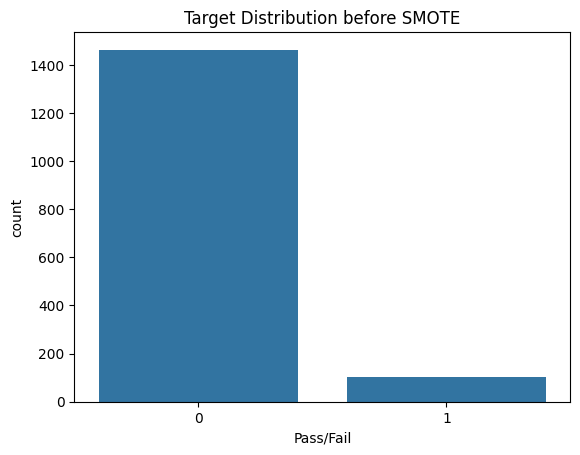

In [ ]:
# check target distribution
sns.countplot(x=y)
plt.title('Target Distribution before SMOTE')
plt.show()

In [ ]:
# Check for target imbalance
print("Target Value Counts before SMOTE:")
print(y.value_counts())

Target Value Counts before SMOTE:
Pass/Fail
0    1463
1     104
Name: count, dtype: int64


In [ ]:
# Apply SMOTE to balance the target
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

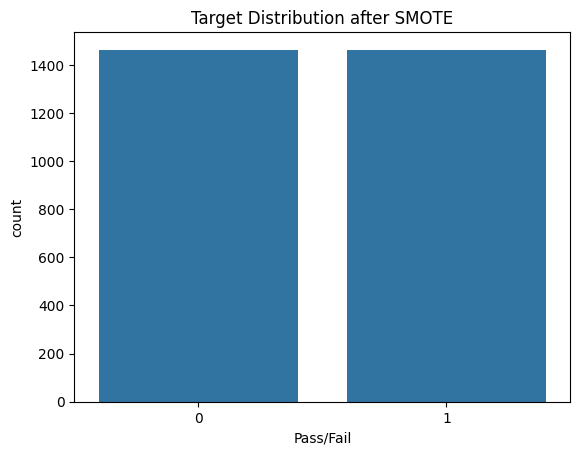

In [ ]:
# Check the distribution after SMOTE
sns.countplot(x=y_resampled)
plt.title("Target Distribution after SMOTE")
plt.show()

In [ ]:
# Check for target imbalance after SMOTE
print("Target Value Counts after SMOTE:")
print(y_resampled.value_counts())

Target Value Counts after SMOTE:
Pass/Fail
0    1463
1    1463
Name: count, dtype: int64


### ***Train-Test Split and Standardization:***

In [ ]:
# Split the data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
# initialize StandardScaler
scaler = StandardScaler()

# Standardize the training data
x_train_scaled = scaler.fit_transform(x_train)

# Apply the same transformation to the test data
x_test_scaled = scaler.transform(x_test)

# Print the shapes of the resulting datasets
print("X_train shape:", x_train.shape)
print("X_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Verify the shapes of the train and test sets
print("Train set shape (x_train):", x_train_scaled.shape)
print("Test set shape (x_test):", x_test_scaled.shape)

X_train shape: (2340, 590)
X_test shape: (586, 590)
y_train shape: (2340,)
y_test shape: (586,)
Train set shape (x_train): (2340, 590)
Test set shape (x_test): (586, 590)


### ***Compare Statistical Characteristics of Train and Test Sets***

In [ ]:
# Compute statistical characteristics (mean and standard deviation) of the original, train, and test sets
original_stats = x.describe().T[['mean', 'std']]
train_stats = pd.DataFrame(x_train_scaled, columns=x.columns).describe().T[['mean', 'std']]
test_stats = pd.DataFrame(x_test_scaled, columns=x.columns).describe().T[['mean', 'std']]

# Combine statistics into one DataFrame for easier comparison
comparison_df = pd.DataFrame({
    'Original Mean': original_stats['mean'],
    'Train Mean': train_stats['mean'],
    'Test Mean': test_stats['mean'],
    'Original Std': original_stats['std'],
    'Train Std': train_stats['std'],
    'Test Std': test_stats['std']
})

# Display first few rows of the comparison DataFrame to verify
print(comparison_df.head())


   Original Mean    Train Mean  Test Mean  Original Std  Train Std  Test Std
0    3014.441551 -8.547768e-16  -0.072487     73.480841   1.000214  0.967525
1    2495.866110 -4.396863e-15   0.007679     80.228143   1.000214  0.996815
2    2200.551958 -1.156909e-15  -0.045742     29.380973   1.000214  0.941081
3    1395.383474  1.928182e-16   0.005466    439.837330   1.000214  0.953711
4       4.171281 -9.109522e-18   0.011541     56.103721   1.000214  1.153980


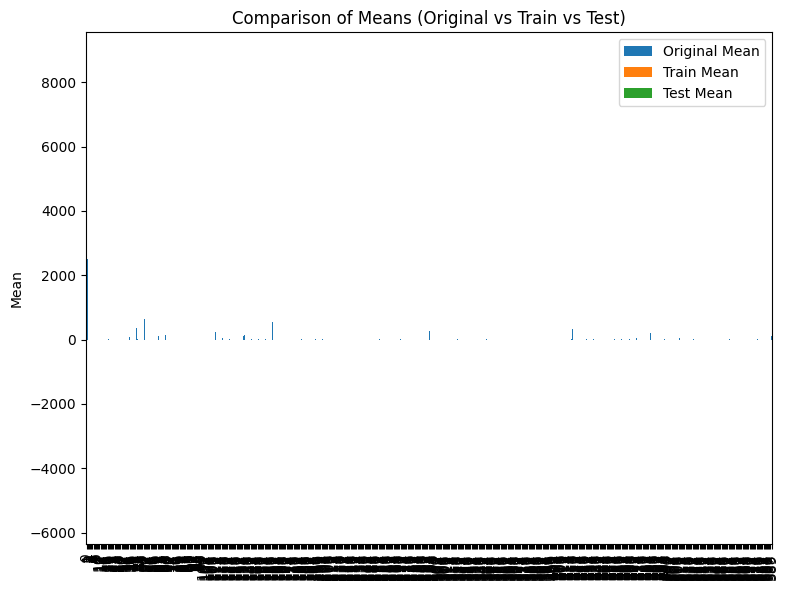

In [ ]:
# Plot comparison of means
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
comparison_df[['Original Mean', 'Train Mean', 'Test Mean']].plot(kind='bar', ax=plt.gca())
plt.title('Comparison of Means (Original vs Train vs Test)')
plt.ylabel('Mean')

plt.tight_layout()
plt.show()

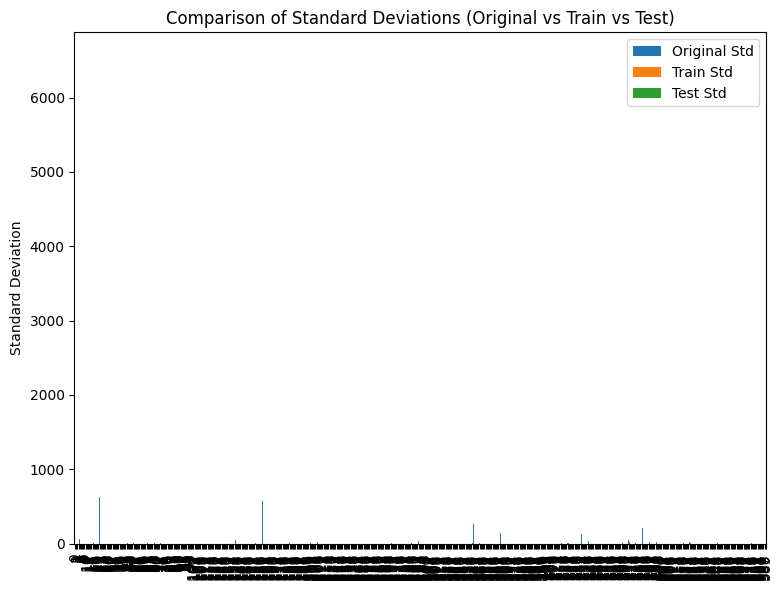

In [ ]:
# Plot comparison of standard deviations
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 2)
comparison_df[['Original Std', 'Train Std', 'Test Std']].plot(kind='bar', ax=plt.gca())
plt.title('Comparison of Standard Deviations (Original vs Train vs Test)')
plt.ylabel('Standard Deviation')

plt.tight_layout()
plt.show()

# **5. Model Training, Testing, and Tuning:**

### ***Random Forest Classifier:***


In [ ]:
# initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# fit the model on training data
rf_model.fit(x_train_scaled, y_train)

# make predictions on test data
y_pred_rf = rf_model.predict(x_test_scaled)

# evaluate the model
print("RandomForest Classifier Report:")
print(classification_report(y_test, y_pred_rf))
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"\nRandom Forest Accuracy: {rf_accuracy:.4f}")

RandomForest Classifier Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       306
           1       0.99      0.99      0.99       280

    accuracy                           0.99       586
   macro avg       0.99      0.99      0.99       586
weighted avg       0.99      0.99      0.99       586


Random Forest Accuracy: 0.9898


* The Random Forest model is trained on the training data and evaluated on the test data.
* Here classification report and accuracy are printed to evaluate performance.
* Random Forest established a strong baseline performance, achieving good accuracy.

### ***Support Vector Machine Classifier with GridSearchCV:***


In [ ]:
# initialize SVM model
svm_model = SVC(random_state=42)

# define hyperparameters to tune
param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'],'gamma': ['scale', 'auto']}

# apply GridSearchCV
grid_search = GridSearchCV(svm_model, param_grid, cv=5)
grid_search.fit(x_train_scaled, y_train)

# make predictions using the best model
y_pred_svm = grid_search.best_estimator_.predict(x_test_scaled)

# evaluate the model
print("SVM Classifier Report:")
print(classification_report(y_test, y_pred_svm))
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f"\nSVM Accuracy: {svm_accuracy:.4f}")


SVM Classifier Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       306
           1       0.99      1.00      0.99       280

    accuracy                           0.99       586
   macro avg       0.99      0.99      0.99       586
weighted avg       0.99      0.99      0.99       586


SVM Accuracy: 0.9932


* Best parameters are selected and used to make predictions.
* Here classification report and accuracy are provided for model evolution.
* SVM is optimized through hyperparameter tuning using GridSearchCV, which improved its accuracy slightly.



### ***Naive Bayes Classifier:***



In [ ]:
# initialize Naive Bayes model
nb_model = GaussianNB()

# fit the model on training data
nb_model.fit(x_train_scaled, y_train)

# make predictions on test data
y_pred_nb = nb_model.predict(x_test_scaled)

# evaluate the model
print("Naive Bayes Classifier Report:")
print(classification_report(y_test, y_pred_nb))
nb_accuracy = accuracy_score(y_test, y_pred_nb)
print(f"\nNaive Bayes Accuracy: {nb_accuracy:.4f}")


Naive Bayes Classifier Report:
              precision    recall  f1-score   support

           0       0.98      0.19      0.32       306
           1       0.53      1.00      0.69       280

    accuracy                           0.58       586
   macro avg       0.76      0.59      0.51       586
weighted avg       0.77      0.58      0.50       586


Naive Bayes Accuracy: 0.5768


*  The Navie bayes model was trained and evaluated on the test set.
*  Here classification report and accuracy are presented.
* Naive Bayes displayed the lowest accuracy out of all the models, probably because of the data's complexity.

### ***Compare Model Performance:***

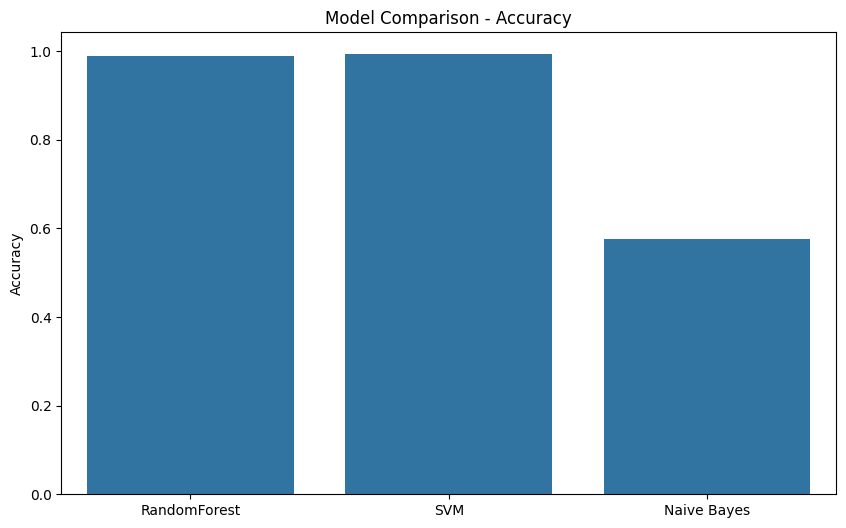

In [ ]:
# Compare accuracies of all models
models = ['RandomForest', 'SVM', 'Naive Bayes']
accuracies = [rf_accuracy, svm_accuracy, nb_accuracy]
# Plot the comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Comparison - Accuracy')
plt.ylabel('Accuracy')
plt.show()

* A bar plot is generated to visually compare the accuracy of three models.
* This comparison helps identify the best performing model.

### ***Display the best model based on accuracy:***

In [ ]:
best_model_index = np.argmax(accuracies)
best_model_name = models[best_model_index]
print(f"\nThe best-performing model is {best_model_name} with an accuracy of {accuracies[best_model_index]:.4f}")



The best-performing model is SVM with an accuracy of 0.9932


* The model with the highest accuracy is identified.

### ***Save the Best Model:***

In [ ]:
dump(rf_model, 'RandomForest.joblib')

['RandomForest.joblib']

* The model with highest accuracy (Random Forest Model) is  saved for future use using joblib.

# **6. Conclusion and Improvisation:**

* ***Conclusion:***
     
  This project aimed to create a classifier to predict the Pass/fail yield ofsemiconductor manufacturing process using sensor data.Through the data cleansing, we handled missing values,removed irrelevent and redundant features. We applied three machine learning models which are Random Forest, Support Vector Machine(SVM) and Naive Bayes with preprocessing as well as data analysis and visualization steps were set up and tested.

  After comparing all models, Random Forest emerged as the best-permoing model with the highest accuracy. The model has been preserved for future applications, and this experience emphasized the significance of feature selection, hyperparameter tuning, and model comparison in creating an efficient predictive model.


* ***Improvisation:***

  For future improvements, we can explore more advanced models, further refine feature selection and use dimensionality reduction techniques like PCA. Additionally incorporating domain- specific knowledge can help improve model performance even further.
